In [1]:
import numpy as np

In [2]:
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [7]:
DATA_PATH="datasets/Training.csv"
data=pd.read_csv(DATA_PATH).dropna(axis=1)

In [8]:
disease_counts=data["lethargy"].value_counts()
temp_df=pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

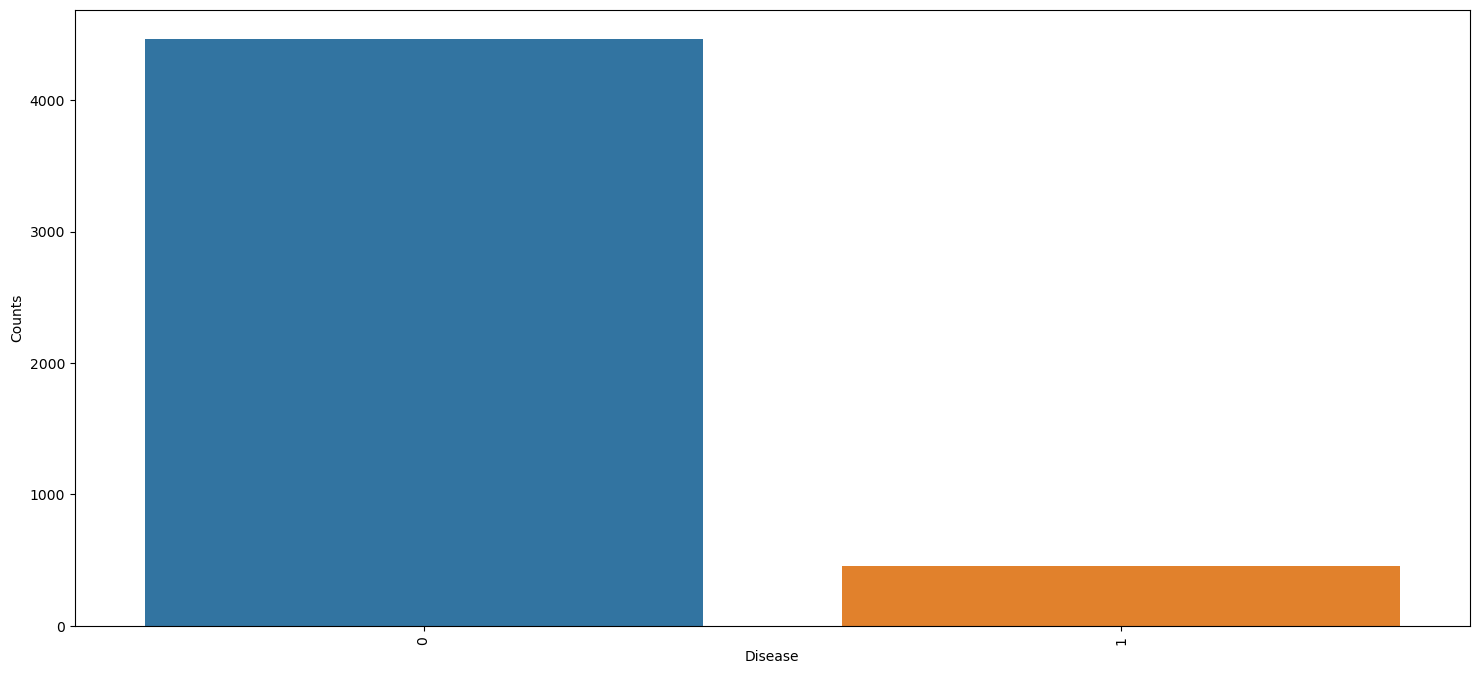

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()